## Normalisation - Standarisation

We saw in previous lectures in section 3 of this course, that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of setting the magnitude of the variables to the same range of values.


#### Normalisation

One method utilised to bring all the variables to a more homogeneous scale is normalisation. Normalisation is synonym of centering the distribution. This means subtracting the mean of the variable to each observation. This procedure will "center" the new distribution at zero (the new mean of the variable will now be zero).

#### Standarisation

Standarisation is also used to bring all the variables to a similar scale. Standarisation means centering the variable at zero, and standarising the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) /  std

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the procedure of standarisation on the titanic dataset.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


The different variables present different value ranges, therefore different magnitudes. Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

In [4]:
# let's look at missing data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# let's fill first the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Standarisation

StandardScaler from scikit-learn removes the mean and scales the data to unit variance. 

In [7]:
# standarisation: we use the StandardScaler from sklearn

scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

In [8]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [  4.98976640e-17   1.16903099e-16   5.41746067e-17]
std (Pclass, Age and Fare):  [ 1.  1.  1.]


As expected, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable  values lie within the same range.

In [9]:
# let's look at the transformed min and max values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.5325562  -2.23351124 -0.67314402]
Max values (Pclass, Age and Fare):  [ 0.84844757  3.86209655  9.95192344]


However, the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers. We observed in previous lectures that the variable Fare has a few extreme outliers, that is, people that paid extraordinarily high Fares. Those observations would drive the value of the maximum value far away from the unit variance (a value of 9.9 in this case).

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.23351124, -1.92873085, -1.62395046, -1.31917007, -1.01438968,
        -0.70960929, -0.4048289 , -0.10004851,  0.20473188,  0.50951227,
         0.81429266,  1.11907305,  1.42385344,  1.72863383,  2.03341422,
         2.33819461,  2.642975  ,  2.94775539,  3.25253577,  3.55731616,
         3.86209655]),
 <a list of 20 Patch objects>)

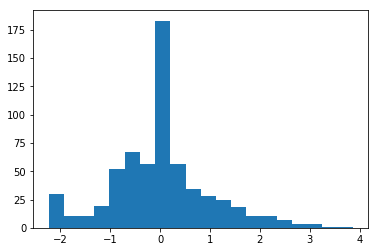

In [10]:
# let's look at the distribution of the transformed variable Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([-0.67314402, -0.14189064,  0.38936273,  0.9206161 ,  1.45186948,
         1.98312285,  2.51437622,  3.04562959,  3.57688297,  4.10813634,
         4.63938971,  5.17064309,  5.70189646,  6.23314983,  6.76440321,
         7.29565658,  7.82690995,  8.35816333,  8.8894167 ,  9.42067007,
         9.95192344]),
 <a list of 20 Patch objects>)

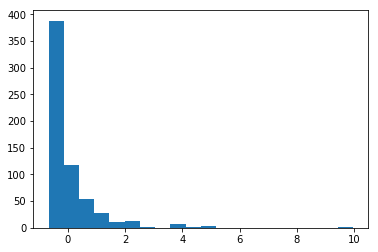

In [11]:
# let's look at the distribution of the transformed variable Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the standarisation of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

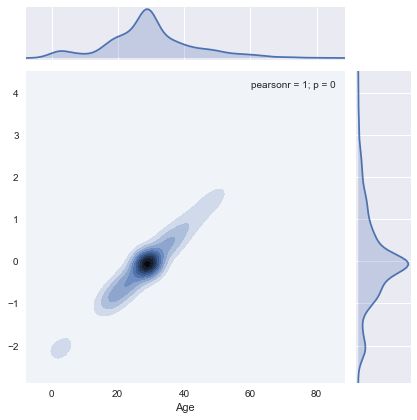

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

The transformed variable has a good correlation with the original one.

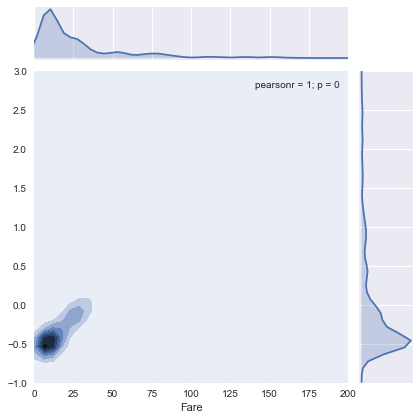

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

The values are concentrated on the lower left side of the plot, because Fare is highly skewed: the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values as shown in the left figure above.

Other scaling methods account for the presence of outliers. I will discuss those in the next lectures.